<a href="https://colab.research.google.com/github/urodge/Restaurant-Data-Analysis/blob/main/LEVEL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.info() #checking the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.isnull().sum() #checking for null values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
fill_cuisines = df['Cuisines'].fillna('Unknown', inplace = True) #filling the null values with unknown


In [8]:
df.shape #checking the shape of the dataset

(9551, 21)

In [9]:
df.describe() #checking the statistics of the dataset

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# **LEVEL 1**

# TASK 1 - Top Cuisines

Determine the top three most common cuisines in the dataset

In [10]:

# Count the occurrence of each cuisine
cuisine_counts = df['Cuisines'].str.split(', ').explode().value_counts()

# Get the top 3 most common cuisines
top_3_cuisines = cuisine_counts.head(3)

# Print the top 3 cuisines
print("The top three most common cuisines are:")
print(top_3_cuisines)

The top three most common cuisines are:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


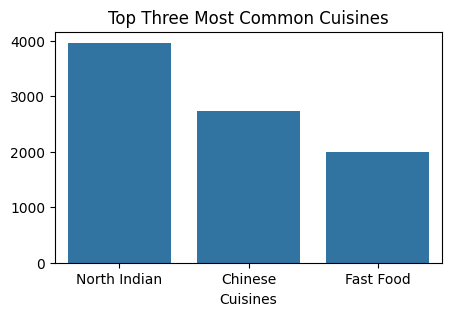

In [11]:
plt.figure(figsize=(5, 3))
sns.barplot(x=top_3_cuisines.index, y=top_3_cuisines.values)
plt.title('Top Three Most Common Cuisines')
plt.show()

Calculate the percentage of restaurants that serve each of the top cuisines.

In [12]:

# Calculate the percentage of restaurants serving each cuisine
total_restaurants = len(df)
cuisine_percentages = (cuisine_counts / total_restaurants) * 100

# Print the percentage of restaurants serving each cuisine
print("Percentage of restaurants serving each cuisine:")
top_5_pct=cuisine_percentages.head(5)
print(top_5_pct)

Percentage of restaurants serving each cuisine:
Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Mughlai         10.417757
Italian          7.999162
Name: count, dtype: float64


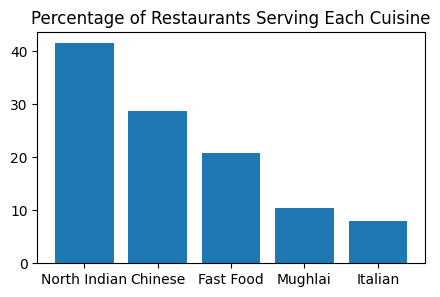

In [13]:
plt.figure(figsize=(5, 3))
plt.bar(top_5_pct.index, top_5_pct.values)
plt.title('Percentage of Restaurants Serving Each Cuisine')
plt.show()

# TASK 2 - City Analysis

Identify the city with the highest number of restaurants in the dataset.

In [14]:

city = df.groupby('City')['Restaurant ID'].count().sort_values(ascending=False)
city.head(1)

City
New Delhi    5473
Name: Restaurant ID, dtype: int64

Calculate the average rating for restaurants in each city.



In [15]:

avg_rating = df.groupby('City')['Aggregate rating'].mean()
avg_rating

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

Determine the city with the highest average rating.

In [16]:

avg_rating = df.groupby('City')['Aggregate rating'].mean().idxmax()
avg_rating


'Inner City'

## TASK-3 - Price Range Distribution

Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

In [17]:

count_price_range = df['Price range'].value_counts()
count_price_range

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

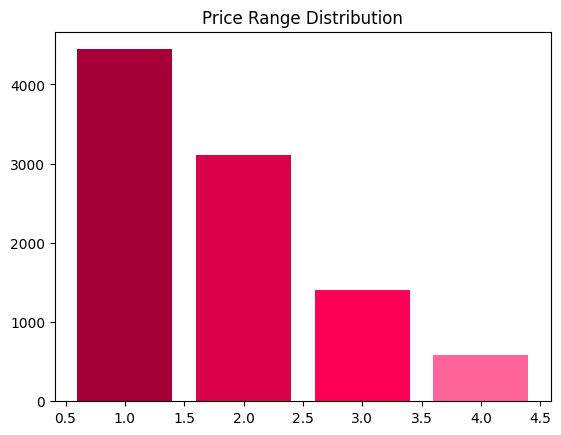

In [18]:
plt.figure.figsize = (5, 3)
colors = ['#A40037','#DA0049','#FE0055','#FF6598']
plt.bar(count_price_range.index, count_price_range.values, color = colors)
plt.title('Price Range Distribution')
plt.show()

Calculate the percentage of restaurants in each price range category.

In [19]:
pct_price_range = (df['Price range'].value_counts() / len(df)) * 100
pct_price_range

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64

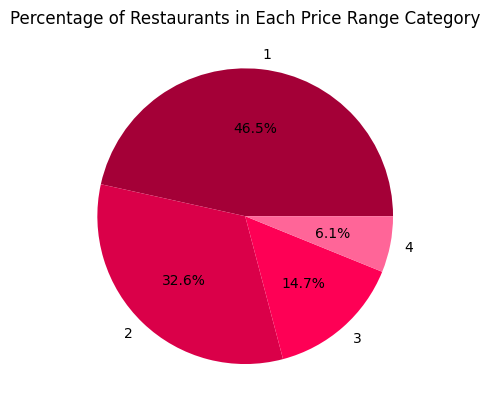

In [20]:

plt.figure.figsize = (5, 3)
plt.pie(pct_price_range, labels=pct_price_range.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of Restaurants in Each Price Range Category')
plt.show()


# TASK - 4 -Online Delivery


Determine the percentage of restaurants that offer online delivery.

In [21]:

yes = df[df['Has Online delivery'] == 'Yes']
count_online_delivery = len(yes)
count_online_delivery_pct = (count_online_delivery/len(df)*100)
print(count_online_delivery_pct)

25.662234321013504


Compare the average ratings of restaurants with and without online delivery.

In [22]:

compare_avg_rating = df.groupby('Has Online delivery')['Aggregate rating'].mean()
compare_avg_rating


Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64